# Google Drive Mounting 

In [32]:
from google.colab import drive

In [33]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Load x_features and y_features



In [34]:
import pickle
x_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project_Covid_Normal/x_features.pkl','rb'))
y_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project_Covid_Normal/y_features.pkl','rb'))

In [35]:
import pickle
#x_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project/x_features_resized.pkl','rb'))
#y_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project/y_features_resized.pkl','rb'))

'No Finding'

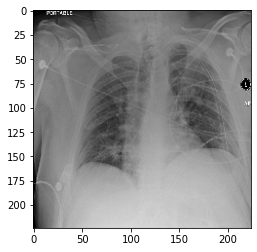

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_features[1])
y_features[1]

In [37]:
x_features[0].shape,y_features[0]

((224, 224, 3), 'No Finding')

In [38]:
import tensorflow 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain = le.fit_transform(y_features)
y_train_data = tensorflow.keras.utils.to_categorical(ytrain, 2)
y_train_data.shape,y_train_data[0]

((1000, 2), array([0., 1.], dtype=float32))

In [39]:
y_train_data[0]

array([0., 1.], dtype=float32)

In [40]:
ytrain

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [41]:
import numpy  
xtrain_arr = numpy.array(x_features) 
xtrain_arr.shape,xtrain_arr[0].shape

((1000, 224, 224, 3), (224, 224, 3))

In [42]:
x_train_data = xtrain_arr.astype('float32')

#Normalizing the input
x_train_data /= 255.0
print('x_train_data shape:', x_train_data.shape)
print(x_train_data.shape[0], 'train samples')

x_train_data shape: (1000, 224, 224, 3)
1000 train samples


## Split the data into training and validation data from `x_train_data` and `y_train_data` obtained from above steps

In [43]:
#def shuffle(matrix, target, test_proportion):
#    ratio = int(matrix.shape[0]/test_proportion) #should be int
#    X_train = matrix[ratio:,:]
#    X_test =  matrix[:ratio,:]
#    Y_train = target[ratio:,:]
#    Y_test =  target[:ratio,:]
#    return X_train, X_test, Y_train, Y_test

#x_train, x_val, y_train, y_val = shuffle(x_train_data, y_train_data, 3)

In [44]:
from sklearn.model_selection import train_test_split
x_train_test, x_val, y_train_test, y_val = train_test_split(x_train_data, y_train_data, test_size=0.20, random_state=1,stratify=y_train_data,shuffle=True)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_train_test, y_train_test, test_size=0.10, random_state=1,stratify=y_train_test,shuffle=True)

In [46]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((720, 224, 224, 3), (720, 2), (200, 224, 224, 3), (200, 2))

In [47]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

0    1  
1.0  0.0    360
0.0  1.0    360
dtype: int64

In [48]:
import pandas as pd
pd.DataFrame(y_val).value_counts()

0    1  
1.0  0.0    100
0.0  1.0    100
dtype: int64

# Model Building

### Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

In [49]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [50]:
img_in = Input(x_train.shape[1:])              #input of model 
model = DenseNet121(include_top= False , # remove  the 3 fully-connected layers at the top of the network
                weights='imagenet',      # pre train weight 
                input_tensor= img_in, 
                input_shape= x_train.shape[1:],
                pooling ='avg') 

x = model.output  
predictions = Dense(2, activation="sigmoid", name="predictions")(x)    # fuly connected layer for predict class 
model = Model(inputs=img_in, outputs=predictions)

In [51]:
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics='accuracy')

In [52]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [53]:
#Training on the dataset
model_history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=45,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/45
23/23 [==============================] - 26s 345ms/step - loss: 0.4430 - accuracy: 0.8286 - val_loss: 9.1374 - val_accuracy: 0.5000
Epoch 2/45
23/23 [==============================] - 5s 201ms/step - loss: 0.1846 - accuracy: 0.9106 - val_loss: 25.2590 - val_accuracy: 0.5050
Epoch 3/45
23/23 [==============================] - 5s 201ms/step - loss: 0.1114 - accuracy: 0.9558 - val_loss: 16.2500 - val_accuracy: 0.5250
Epoch 4/45
23/23 [==============================] - 5s 201ms/step - loss: 0.0843 - accuracy: 0.9648 - val_loss: 16.5760 - val_accuracy: 0.5000
Epoch 5/45
23/23 [==============================] - 5s 200ms/step - loss: 0.1000 - accuracy: 0.9658 - val_loss: 5.5055 - val_accuracy: 0.5300
Epoch 6/45
23/23 [==============================] - 5s 201ms/step - loss: 0.0483 - accuracy: 0.9791 - val_loss: 3.6874 - val_accuracy: 0.5200
Epoch 7/45
23/23 [==============================] - 5s 208ms/step - loss: 0.0548 - accuracy: 0.9819 - val_loss: 5.8664 - val_accuracy: 0.6100
Ep

In [54]:
x_val.shape

(200, 224, 224, 3)

In [59]:
from sklearn import metrics
import numpy as np
predictions = model.predict(x_train)
y_train_pred = []
y_train_act = []
for val in predictions:
    y_train_pred.append(np.argmax(val))

for val1 in y_train:
    y_train_act.append(np.argmax(val1))

cr=metrics.classification_report(y_train_act,y_train_pred)
cm=metrics.confusion_matrix(y_train_act,y_train_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       360

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

[[360   0]
 [  0 360]]


In [60]:
from sklearn import metrics
predictions = model.predict(x_val)
y_val_pred = []
y_val_act = []
for val in predictions:
    y_val_pred.append(np.argmax(val))

for val1 in y_val:
    y_val_act.append(np.argmax(val1))

cr=metrics.classification_report(y_val_act,y_val_pred)
cm=metrics.confusion_matrix(y_val_act,y_val_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.97      0.99      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

[[97  3]
 [ 1 99]]


In [61]:
from sklearn import metrics
predictions = model.predict(x_test)
y_test_pred = []
y_test_act = []
for val in predictions:
  y_test_pred.append(np.argmax(val))

for val1 in y_test:
  y_test_act.append(np.argmax(val1))

cr=metrics.classification_report(y_test_act,y_test_pred)
cm=metrics.confusion_matrix(y_test_act,y_test_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.97      0.97      0.97        40

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

[[39  1]
 [ 1 39]]


In [62]:
scores_train = model.evaluate(x_train, y_train, verbose=2)
print("Accuracy on Train Data: %.2f%%" % (scores_train[1]*100))

23/23 - 1s - loss: 1.2499e-05 - accuracy: 1.0000
Accuracy on Train Data: 100.00%


In [63]:
scores_val = model.evaluate(x_val, y_val, verbose=2)
print("Accuracy on Val Data: %.2f%%" % (scores_val[1]*100))

7/7 - 0s - loss: 0.1147 - accuracy: 0.9800
Accuracy on Val Data: 98.00%


In [64]:
scores_test = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy on Test Data: %.2f%%" % (scores_test[1]*100))

3/3 - 0s - loss: 0.0616 - accuracy: 0.9750
Accuracy on Test Data: 97.50%


In [65]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('final_model.h5')

In [68]:
from tqdm import tqdm
import numpy as np
import cv2

def predict_image(id):
  x_test = []
  y_test = []

  img=cv2.imread('/content/drive/MyDrive/Capstone_Project_Covid_Normal/data/{}'.format(id),1)
  img_resize=cv2.resize(img,(224,224))
  x_test.append(img_resize)
  #y_test.append(lab)
  xtest_arr = numpy.array(x_test) 
  x_test_data = xtest_arr.astype('float32')
  x_test_data /= 255.0
  predictions = model.predict(x_test_data)

  print((np.argmax(predictions)))
  print('Predicted image is', le.inverse_transform([(np.argmax(predictions))])[0])
  #return le.inverse_transform([(np.argmax(predictions))])[0]

In [69]:
predict_image('00000285_002.png')  # Normal 
predict_image('00000324_002.png')  # Normal 
predict_image('covid-19-pneumonia-58-day-3.jpg')  # Covid19
predict_image('covid-19-pneumonia-progression-and-regression-day24.jpg')  # Covid19
predict_image('yxppt-2020-02-19_00-51-27_287214-day8.jpg')  # Covid19
predict_image('00000468_048.png')  # Normal 

1
Predicted image is No Finding
1
Predicted image is No Finding
0
Predicted image is Covid19
0
Predicted image is Covid19
0
Predicted image is Covid19
1
Predicted image is No Finding


In [82]:
predict_image('00000443_003.png')  # Normal 

1
Predicted image is No Finding


In [76]:
from tqdm import tqdm
import numpy as np
import cv2

def predict_image_v(id):
  x_test = []
  y_test = []

  img=cv2.imread('/content/{}'.format(id),1)
  img_resize=cv2.resize(img,(224,224))
  x_test.append(img_resize)
  #y_test.append(lab)
  xtest_arr = numpy.array(x_test) 
  x_test_data = xtest_arr.astype('float32')
  x_test_data /= 255.0
  predictions = model.predict(x_test_data)

  print((np.argmax(predictions)))
  print('Predicted image is', le.inverse_transform([(np.argmax(predictions))])[0])
  #return le.inverse_transform([(np.argmax(predictions))])[0]

In [78]:
predict_image_v('IMG-20200509-WA0001.jpg')

0
Predicted image is Covid19


In [83]:
predict_image_v('normal_1.jpg')

0
Predicted image is Covid19


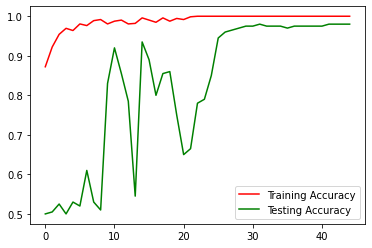

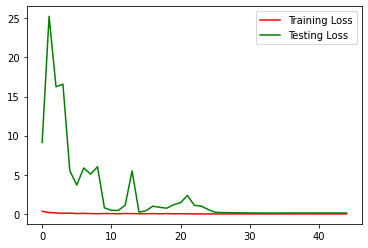

In [72]:
import matplotlib.pyplot as plt
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()